In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['figure.figsize'] = (10,10)
plt.rcParams['figure.dpi'] = 500
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
from sklearn.preprocessing import OrdinalEncoder

In [7]:
df=pd.read_csv('Life-Expectancy-Data-Averaged.csv')

In [17]:
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,Afghanistan,Asia,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,Albania,Rest of Europe,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,Algeria,Africa,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,Angola,Africa,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,Antigua and Barbuda,Central America and Caribbean,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,"Venezuela, RB",South America,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,Vietnam,Asia,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,"Yemen, Rep.",Middle East,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,Zambia,Africa,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


In [3]:
Encoder=OrdinalEncoder()


In [9]:
df[['Country','Region']]

,Country,Region
0,Afghanistan,Asia
1,Albania,Rest of Europe
2,Algeria,Africa
3,Angola,Africa
4,Antigua and Barbuda,Central America and Caribbean
...,...,...
174,"Venezuela, RB",South America
175,Vietnam,Asia
176,"Yemen, Rep.",Middle East
177,Zambia,Africa


In [11]:
df[['Country','Region']]=Encoder.fit_transform(df[['Country','Region']])

In [11]:
df

,Country,Region,Year,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,0.0,1.0,2007.5,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,1.0,7.0,2007.5,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,2.0,0.0,2007.5,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,3.0,0.0,2007.5,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,4.0,2.0,2007.5,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174.0,8.0,2007.5,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,175.0,1.0,2007.5,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,176.0,4.0,2007.5,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,177.0,0.0,2007.5,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


In [13]:
df.drop(columns=['Year'],inplace=True)
df

,Country,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
0,0.0,1.0,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0,59.65625
1,1.0,7.0,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0,75.95000
2,2.0,0.0,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0,73.78750
3,3.0,0.0,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0,52.82500
4,4.0,2.0,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0,75.35000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174.0,8.0,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0,72.79375
175,175.0,1.0,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0,74.33125
176,176.0,4.0,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0,64.16250
177,177.0,0.0,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0,52.33125


In [15]:
df.describe()

,Country,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,89.000000,2.703911,30.363792,42.938268,192.251775,4.820882,84.292598,77.344972,25.032926,86.499651,86.271648,0.894288,11540.924930,36.675915,4.865852,4.899825,7.632123,0.793296,68.856075
std,51.816986,2.634374,26.725485,42.916952,111.659044,3.914554,13.820223,17.315208,2.165490,13.581153,13.931532,2.311895,16893.054182,136.655286,4.111094,4.195663,3.126912,0.406077,9.197699
min,0.000000,0.000000,2.381250,3.000000,57.710313,0.000025,30.687500,16.250000,20.212500,35.750000,31.312500,0.010000,263.937500,0.085000,0.100000,0.100000,1.337500,0.000000,45.606250
25%,44.500000,0.000000,8.159375,9.775000,107.046906,1.317813,78.218750,64.000000,23.225000,80.531250,80.812500,0.080000,1409.906250,2.108125,1.756250,1.731250,4.946875,1.000000,62.303125
50%,89.000000,2.000000,19.368750,23.137500,164.432406,4.209375,88.000000,83.000000,25.650000,92.375000,92.062500,0.164375,4402.625000,7.660625,3.556250,3.718750,7.831250,1.000000,71.506250
75%,133.500000,4.000000,48.959375,68.321875,247.523922,7.843438,94.375000,92.250000,26.425000,96.062500,95.781250,0.516250,12037.781250,22.745313,7.165625,7.056250,10.365625,1.000000,74.937500
max,178.000000,8.000000,115.718750,178.725000,572.974312,15.100000,98.875000,99.000000,31.687500,98.937500,99.000000,18.164375,102972.687500,1321.239375,27.100000,27.943750,13.268750,1.000000,82.456250


In [17]:
df.dtypes

Country                        float64
Region                         float64
Infant_deaths                  float64
Under_five_deaths              float64
Adult_mortality                float64
Alcohol_consumption            float64
Hepatitis_B                    float64
Measles                        float64
BMI                            float64
Polio                          float64
Diphtheria                     float64
Incidents_HIV                  float64
GDP_per_capita                 float64
Population_mln                 float64
Thinness_ten_nineteen_years    float64
Thinness_five_nine_years       float64
Schooling                      float64
Economy_status                 float64
Life_expectancy                float64
dtype: object

In [19]:
df.corr()

,Country,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status,Life_expectancy
Country,1.000000,0.078402,-0.063007,-0.060073,0.009861,-0.057450,0.003241,-0.021218,0.070476,0.033982,0.020840,0.030358,0.027274,-0.044441,0.010929,0.027583,0.044538,0.018956,0.013569
Region,0.078402,1.000000,-0.549228,-0.560474,-0.492996,0.279045,0.173732,0.259890,0.560553,0.297283,0.285230,-0.322920,0.268416,-0.061264,-0.517572,-0.514672,0.489079,-0.188824,0.534902
Infant_deaths,-0.063007,-0.549228,1.000000,0.987113,0.801403,-0.474708,-0.563377,-0.572984,-0.663046,-0.787676,-0.766571,0.349174,-0.527737,0.012181,0.539041,0.522838,-0.804119,0.491625,-0.925210
Under_five_deaths,-0.060073,-0.560474,0.987113,1.000000,0.808765,-0.430579,-0.561534,-0.563805,-0.671676,-0.788192,-0.767443,0.364131,-0.487815,-0.001150,0.513324,0.494453,-0.794305,0.444753,-0.926917
Adult_mortality,0.009861,-0.492996,0.801403,0.808765,1.000000,-0.255737,-0.373765,-0.456096,-0.522031,-0.558145,-0.545932,0.698686,-0.524443,-0.053163,0.414027,0.410116,-0.585492,0.443039,-0.947485
Alcohol_consumption,-0.057450,0.279045,-0.474708,-0.430579,-0.255737,1.000000,0.200192,0.346817,0.292670,0.335938,0.335655,-0.035410,0.453253,-0.040623,-0.499256,-0.484319,0.638571,-0.683701,0.416061
Hepatitis_B,0.003241,0.173732,-0.563377,-0.561534,-0.373765,0.200192,1.000000,0.469372,0.374349,0.810698,0.840369,-0.069664,0.177331,-0.100396,-0.249768,-0.254809,0.378082,-0.131750,0.451723
Measles,-0.021218,0.259890,-0.572984,-0.563805,-0.456096,0.346817,0.469372,1.000000,0.441975,0.579777,0.556216,-0.165023,0.336252,-0.109160,-0.396136,-0.424976,0.532334,-0.322733,0.529514
BMI,0.070476,0.560553,-0.663046,-0.671676,-0.522031,0.292670,0.374349,0.441975,1.000000,0.489551,0.455793,-0.156277,0.337446,-0.171891,-0.648553,-0.650356,0.631831,-0.247128,0.594403
Polio,0.033982,0.297283,-0.787676,-0.788192,-0.558145,0.335938,0.810698,0.579777,0.489551,1.000000,0.975825,-0.145395,0.347979,-0.042797,-0.374703,-0.365732,0.606130,-0.315356,0.682368


In [21]:
x=df.iloc[:,:-1]
x

,Country,Region,Infant_deaths,Under_five_deaths,Adult_mortality,Alcohol_consumption,Hepatitis_B,Measles,BMI,Polio,Diphtheria,Incidents_HIV,GDP_per_capita,Population_mln,Thinness_ten_nineteen_years,Thinness_five_nine_years,Schooling,Economy_status
0,0.0,1.0,71.08125,98.61250,265.804969,0.016125,64.5625,24.3750,22.46250,55.3750,55.1250,0.022500,408.5625,27.450625,16.58125,15.58125,2.90000,1.0
1,1.0,7.0,15.25625,17.14375,83.132969,4.696875,98.0000,95.9375,25.85625,98.1250,98.0625,0.025625,3071.1250,2.969375,1.61875,1.70000,9.24375,1.0
2,2.0,0.0,26.75625,31.19375,113.439281,0.400625,88.3125,93.2500,24.86875,91.7500,91.8750,0.021875,3745.1250,34.820625,6.09375,5.97500,6.99375,1.0
3,3.0,0.0,88.76875,144.16250,297.844063,4.935625,68.8125,64.0000,22.51875,35.7500,55.5625,1.303750,2647.8125,21.623750,6.19375,6.66875,4.60625,1.0
4,4.0,2.0,9.47500,11.51875,142.478813,7.755000,98.2500,75.4375,25.85000,96.9375,98.3125,0.125000,14678.7500,0.085000,3.42500,3.37500,9.01875,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
174,174.0,8.0,15.85000,18.50000,151.056156,7.458125,72.4375,83.0000,26.49375,79.1875,75.2500,0.400000,9294.8750,27.392500,1.65000,1.56250,8.23750,1.0
175,175.0,1.0,19.50000,24.47500,133.054406,1.742500,87.4375,65.0000,20.76250,94.9375,91.7500,0.196875,1807.8750,86.032500,14.92500,15.62500,6.90000,1.0
176,176.0,4.0,52.44375,69.57500,239.653938,0.047000,60.1875,95.0000,23.02500,71.6250,72.6250,0.025000,2406.8125,21.730625,13.83125,13.75000,2.22500,1.0
177,177.0,0.0,60.58125,99.20625,452.761219,2.903125,82.8750,39.1875,22.00000,82.9375,83.8125,6.868125,1059.8750,12.862500,6.88125,6.76250,6.43750,1.0


In [23]:
y=df['Life_expectancy']
y

0      59.65625
1      75.95000
2      73.78750
3      52.82500
4      75.35000
         ...   
174    72.79375
175    74.33125
176    64.16250
177    52.33125
178    48.66250
Name: Life_expectancy, Length: 179, dtype: float64

In [25]:
from sklearn.preprocessing import StandardScaler

In [27]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-1.72240142, -0.64861327,  1.52781785, ...,  2.55296649,
        -1.51759822,  0.51045409],
       [-1.7030486 ,  1.63535607, -0.56687164, ..., -0.76479003,
         0.51685099,  0.51045409],
       [-1.68369577, -1.02927482, -0.13536373, ...,  0.2569774 ,
        -0.20472705,  0.51045409],
       ...,
       [ 1.68369577,  0.4933714 ,  0.82849362, ...,  2.11527956,
        -1.73407163,  0.51045409],
       [ 1.7030486 , -1.02927482,  1.13383237, ...,  0.44519771,
        -0.38311718,  0.51045409],
       [ 1.72240142, -1.02927482,  0.7431301 , ...,  0.49897494,
        -0.13457363,  0.51045409]])

In [29]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2, random_state=1)

In [31]:
dtr = DecisionTreeRegressor()

dtr.fit(xtrain,ytrain)
ypred = dtr.predict(xtest)
ypred

array([66.45625, 54.875  , 61.14375, 58.95   , 73.2    , 57.0375 ,
       72.9875 , 65.7875 , 68.9625 , 62.7    , 78.54375, 72.9875 ,
       74.80625, 72.20625, 72.8375 , 79.55   , 69.225  , 58.20625,
       51.88125, 48.6625 , 70.6625 , 76.78125, 55.10625, 68.9625 ,
       73.64375, 51.88125, 72.79375, 67.33125, 79.08125, 46.7    ,
       70.6625 , 72.35625, 69.9    , 59.65625, 72.9875 , 72.9875 ])

In [33]:
dtr.score(xtrain,ytrain), dtr.score(xtest,ytest)

(1.0, 0.9253040576082502)

In [35]:
import numpy as np

Predicted = np.array([66.975 , 57.73125, 62.0625 , 56.625 , 74.5125 , 45.60625, 76.20625,
                 66.45625, 67.33125, 60.35 , 80.01875, 74.5125 , 75.8125 , 73.7875 ,
                 75.625 , 78.44375, 69.61875, 55.06875, 53.35625, 52.2875 , 67.33125,
                 77.9 , 55.10625, 65.1625 , 73.7875 , 52.2875 , 74.5125 , 70.6625 ,
                 81.675 , 46.7 , 70.6375 , 72.35625, 67.33125, 56.625 , 74.475 , 73.7875])




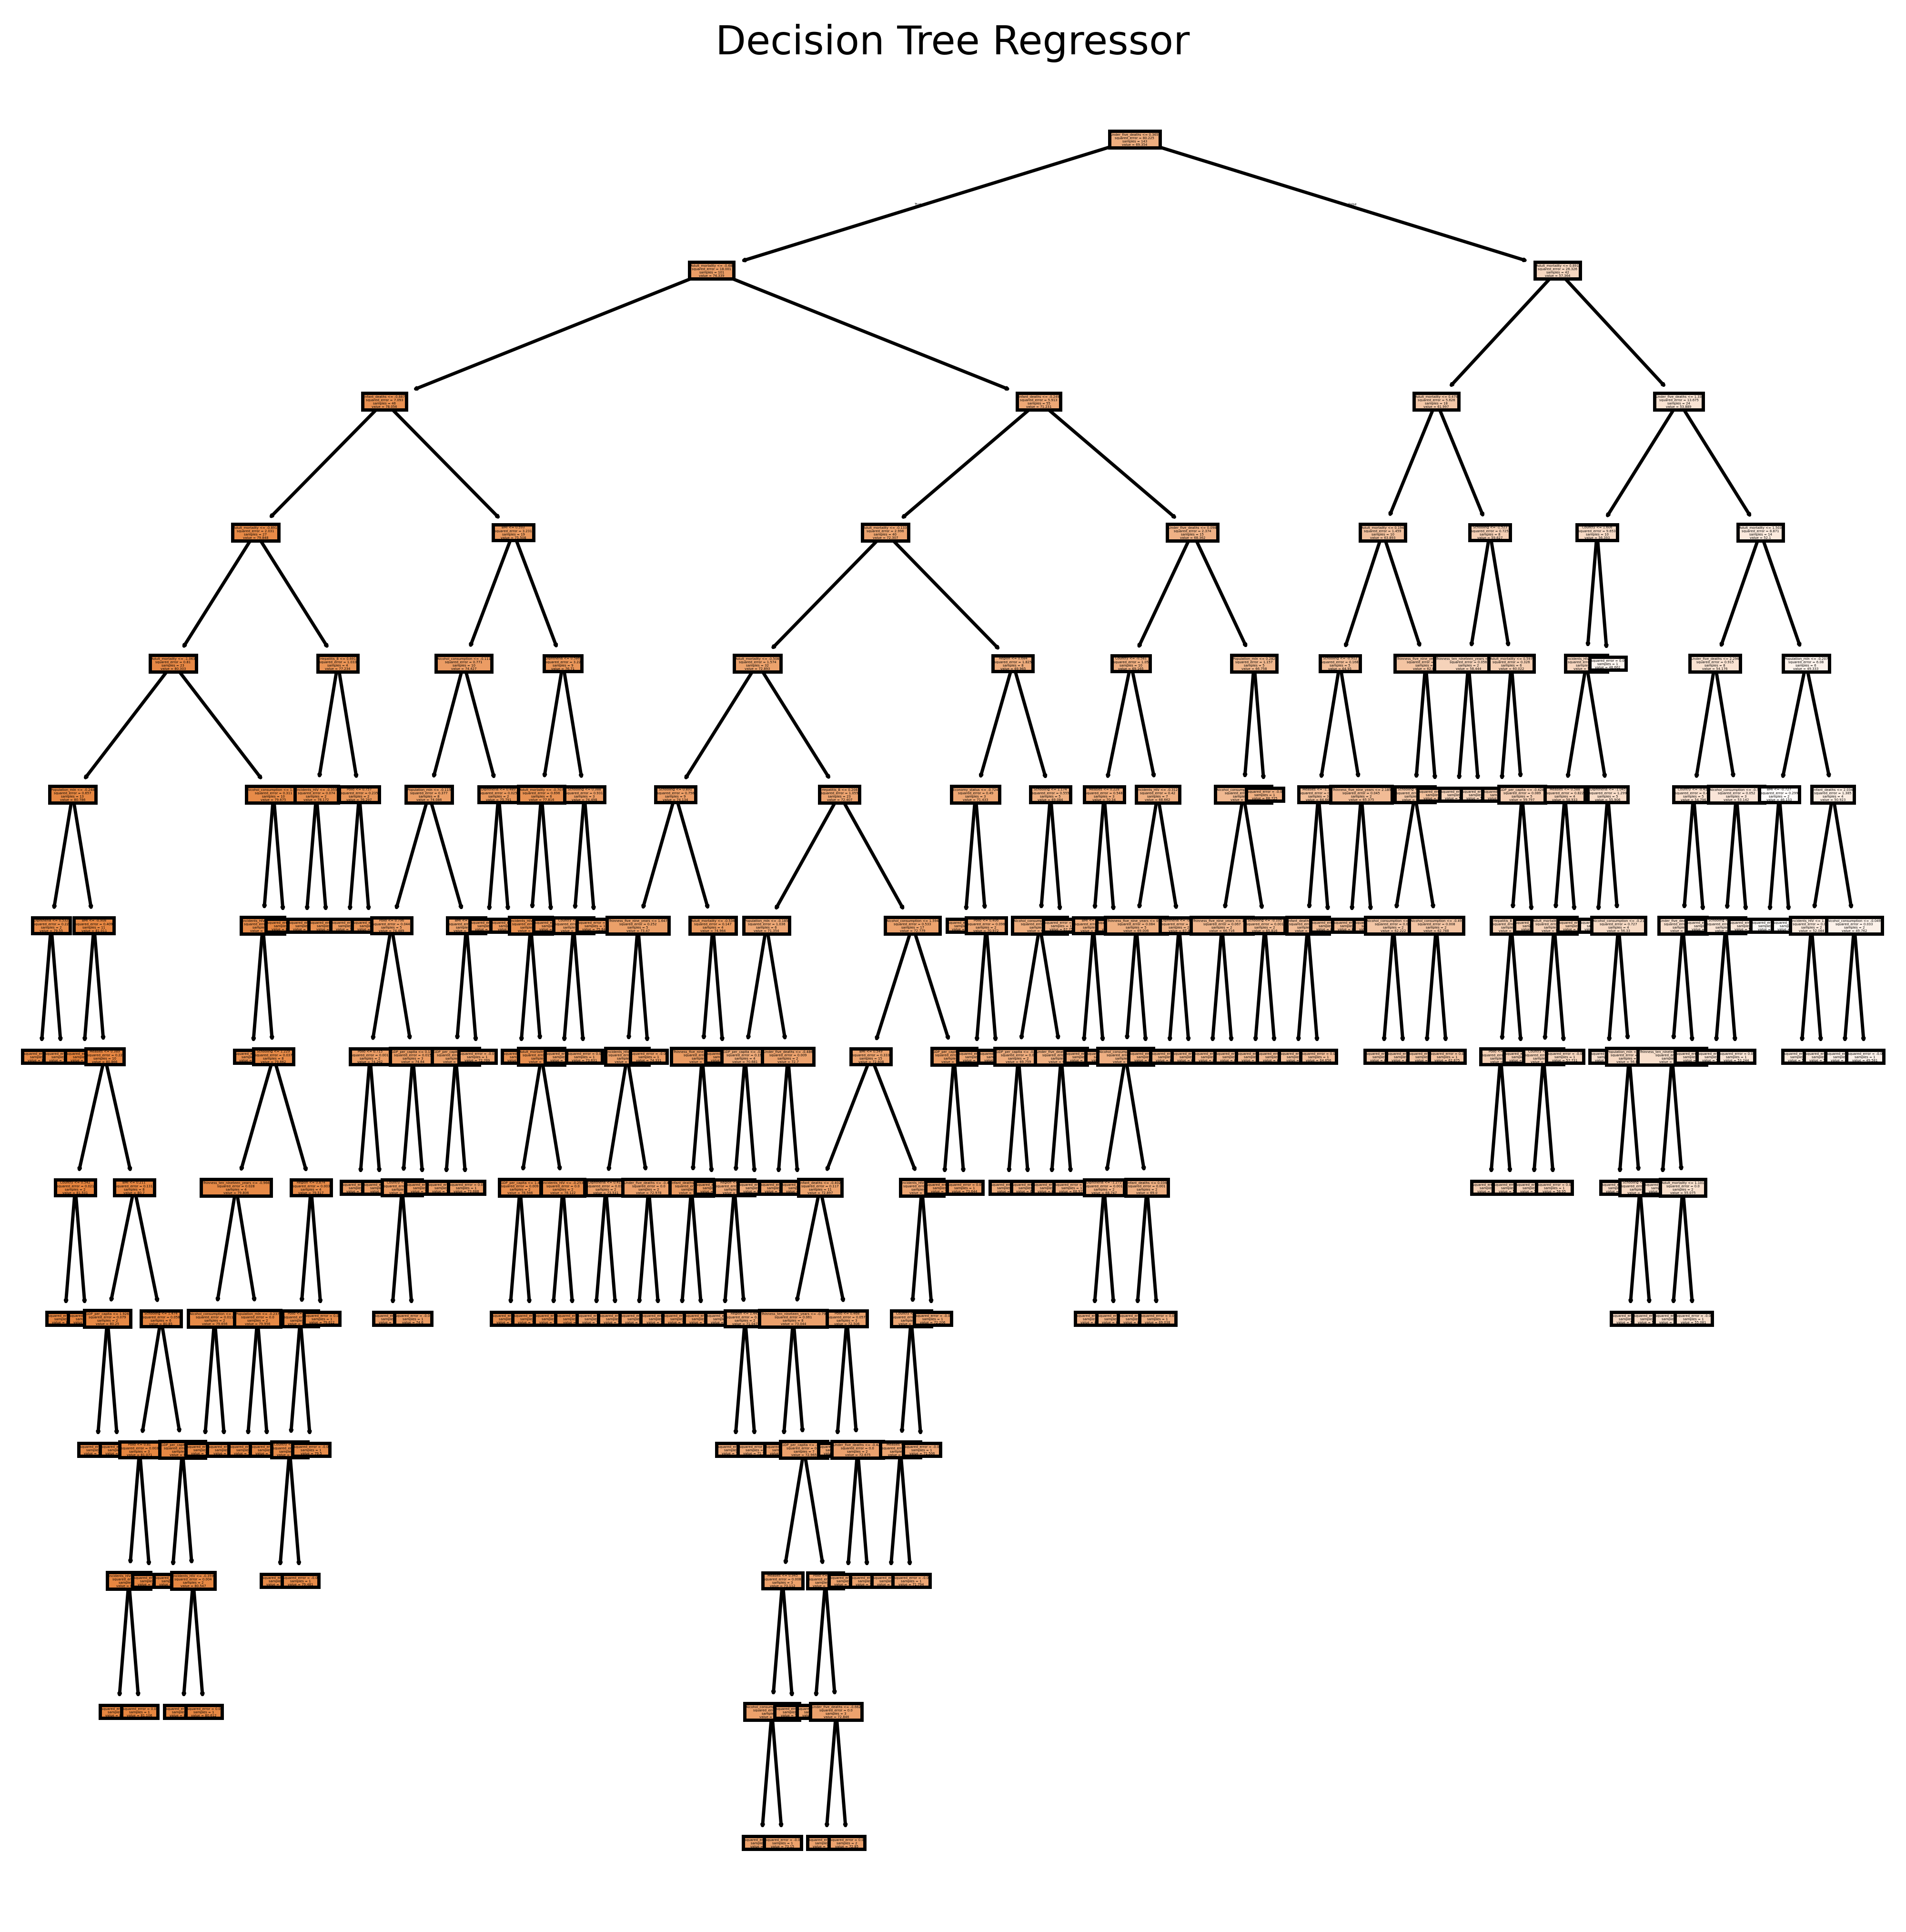

In [37]:
plt.figure(figsize=(10,10))  
tree.plot_tree(dtr, feature_names=df.columns, filled=True)
plt.title('Decision Tree Regressor')
plt.show()


In [43]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize GradientBoostingRegressor
model = GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42)

# Fit the model
model.fit(xtrain,ytrain)


GradientBoostingRegressor(random_state=42)

In [45]:
model.predict(xtest)

array([67.60145981, 57.7777454 , 61.58988197, 57.50855122, 72.89104424,
       50.66028112, 75.05558199, 66.57300138, 67.6539731 , 63.34041564,
       78.9596266 , 74.30052939, 75.61707296, 73.00547679, 73.75751093,
       79.69150068, 69.80547543, 57.00202729, 50.97582283, 53.51203555,
       68.5838135 , 76.37771429, 54.00177749, 69.31486522, 73.21964413,
       50.0648463 , 72.70880346, 68.7574957 , 80.85147715, 48.48186153,
       70.54089804, 72.64300762, 70.2305122 , 56.7980663 , 75.0722568 ,
       74.25126278])

In [47]:
model.score(xtrain,ytrain), model.score(xtest,ytest)

(0.9994265690265154, 0.9715358843467825)